In [4]:
import pandas as pd
import matplotlib.pyplot as plt

There were many files with my data that I received from Amazon from the data request. I'm first looking at listening.csv from C:\Users\Paedr\OneDrive\Projects\Audible Data Analysis\Audible\Audible.Listening\Account Holder

In [8]:
# Load the CSV file
df = pd.read_csv("Listening.csv.txt")

# Quick overview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13883 entries, 0 to 13882
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Start Date                   13883 non-null  object 
 1   End Date                     13883 non-null  object 
 2   Event Duration Milliseconds  13883 non-null  int64  
 3   Start Position Milliseconds  13883 non-null  int64  
 4   End Position Milliseconds    13883 non-null  int64  
 5   Product Name                 13883 non-null  object 
 6   ASIN                         13883 non-null  object 
 7   Book Length Milliseconds     13883 non-null  int64  
 8   Delivery Type                13883 non-null  object 
 9   Narration Speed              13883 non-null  float64
 10  Bookmark                     13883 non-null  int64  
 11  Audio Type                   13883 non-null  object 
 12  Asin Owned                   13883 non-null  object 
 13  Listening Mode  

,Start Date,End Date,Event Duration Milliseconds,Start Position Milliseconds,End Position Milliseconds,Product Name,ASIN,Book Length Milliseconds,Delivery Type,Narration Speed,Bookmark,Audio Type,Asin Owned,Listening Mode,Store,App Version,Local Timezone
0,2025-10-18,2025-10-18,4112672,10098926,16267838,The Hard Thing About Hard Things: Building a B...,B072LCYC7P,28663827,Download,1.5,0,FullTitle,No,Online,Audible,4.54,America/Vancouver
1,2025-10-18,2025-10-18,827261,8858185,10098926,The Hard Thing About Hard Things: Building a B...,B072LCYC7P,28663827,Download,1.5,0,FullTitle,No,Online,Audible,4.54,America/Vancouver
2,2025-10-18,2025-10-18,5162880,1114350,8858185,The Hard Thing About Hard Things: Building a B...,B072LCYC7P,28663827,Download,1.5,0,FullTitle,No,Online,Audible,4.54,America/Vancouver
3,2025-10-18,2025-10-18,14366,1093112,1114350,The Hard Thing About Hard Things: Building a B...,B072LCYC7P,28663827,Download,1.5,0,FullTitle,No,Online,Audible,4.54,America/Vancouver
4,2025-10-18,2025-10-18,189,1108103,1108111,The Hard Thing About Hard Things: Building a B...,B072LCYC7P,28663827,Download,1.5,0,FullTitle,No,Online,Audible,4.54,America/Vancouver


In [10]:
# Convert date strings to datetime objects
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# Compute duration in hours
df['Duration Hours'] = df['Event Duration Milliseconds'] / (1000 * 60 * 60)

# Extract the month as a Period (YYYY-MM)
df['Month'] = df['Start Date'].dt.to_period('M')


## Step 4: Total listening hours per book

In [12]:
hours_per_book = (
    df.groupby('Product Name')['Duration Hours']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

hours_per_book.head(15)


,Product Name,Duration Hours
0,"Words of Radiance: The Stormlight Archive, Boo...",43.139797
1,Oathbringer (Unabridged),42.693218
2,To Lie with Lions: The House of Niccolo 6 (Una...,34.898057
3,"A Memory of Light: Wheel of Time, Book 14 (Una...",29.159326
4,"Silent Spring Revolution: John F. Kennedy, Rac...",28.246110
5,The Gathering Storm: Book Twelve of the Wheel ...,24.792951
6,"Gemini: House of Niccolò, Book 8 (Unabridged)",24.041758
7,"Checkmate: The Lymond Chronicles, Book 6 (Unab...",24.008139
8,Death's End (Unabridged),23.573982
9,The Overstory (Unabridged),22.621411


## Step 5: Total listening hours per month

In [18]:
hours_per_month = (
    df.groupby('Month')['Duration Hours']
    .sum()
    .reset_index()
)

hours_per_month


,Month,Duration Hours
0,2017-11,21.294172
1,2017-12,18.514433
2,2018-03,1.930648
3,2018-04,27.254417
4,2018-05,0.005181
...,...,...
75,2025-06,64.966727
76,2025-07,8.467889
77,2025-08,35.998790
78,2025-09,87.899425


## Step 6: Visualize monthly listening activity

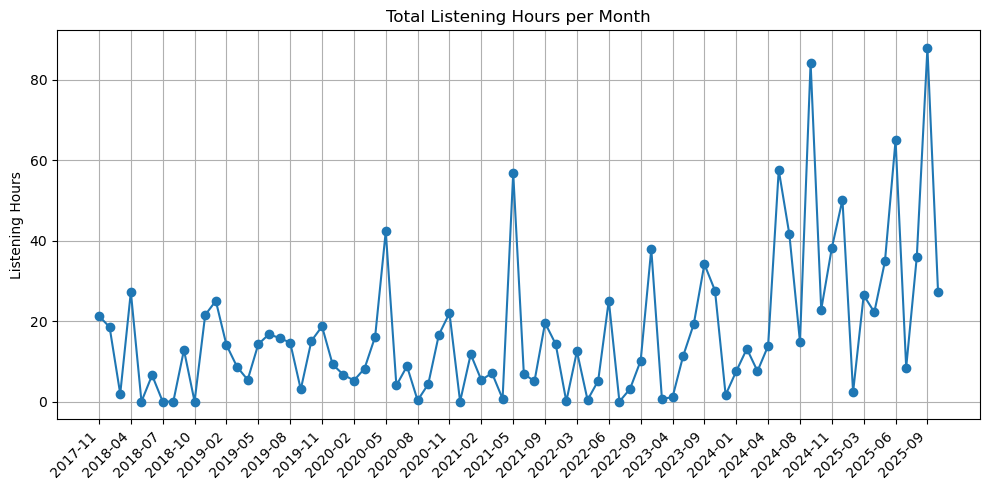

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(hours_per_month['Month'].astype(str),
         hours_per_month['Duration Hours'],
         marker='o')

# Only show every 3rd label
plt.xticks(ticks=range(0, len(hours_per_month), 3),
           labels=hours_per_month['Month'].astype(str)[::3],
           rotation=45, ha='right')

plt.ylabel('Listening Hours')
plt.title('Total Listening Hours per Month')
plt.grid(True)
plt.tight_layout()
plt.show()



## Export Summaries

In [20]:
hours_per_book.to_csv("listening_hours_by_book.csv", index=False)
hours_per_month.to_csv("listening_hours_by_month.csv", index=False)


## Tracking Re-listening

Audible’s Start Position and End Position (in milliseconds) within each book tell you precisely what segments of the audiobook you listened to. If two or more sessions for the same book overlap, that means you’ve **re-listened** to that portion.

Let’s walk through how you can detect and quantify that overlap.

##🧠 Concept

For each **book** (ASIN or Product Name), you want to:

1. Sort sessions by their Start Position Milliseconds

1. Compare each session’s start and end against the previous one

1. Compute how much time (if any) overlaps

Then you can:

* Sum up total overlap time per book

* Calculate your re-listening percentage = overlapped time ÷ total listening time

In [39]:
def calculate_overlap(df, book_id_col='ASIN', start_col='Start Position Milliseconds', end_col='End Position Milliseconds'):
    """
    Calculate total overlap (in milliseconds) of listening sessions per book.

    Parameters:
        df (pd.DataFrame): The listening dataset.
        book_id_col (str): Column name identifying the book (e.g., 'ASIN').
        start_col (str): Column name for session start position.
        end_col (str): Column name for session end position.

    Returns:
        pd.DataFrame: A DataFrame with columns [book_id_col, 'Overlap Milliseconds'].
    """
    def compute_overlap(group):
        # Sort sessions by start time
        intervals = group[[start_col, end_col]].sort_values(start_col).values
        total_overlap = 0
        prev_start, prev_end = intervals[0]

        for start, end in intervals[1:]:
            if start < prev_end:  # overlap
                total_overlap += min(end, prev_end) - start
                prev_end = max(prev_end, end)
            else:
                prev_start, prev_end = start, end

        return total_overlap

    # # Apply to each book (no include_group argument)
    # overlap_by_book = (
    #     df.groupby(book_id_col)[[start_col, end_col]]
    #     .apply(compute_overlap)
    #     .reset_index(name='Overlap Milliseconds')
    # )

    # # Merge with book names and total listening time
    # book_durations = (
    #     df.groupby('ASIN')['Event Duration Milliseconds']
    #     .sum()
    #     .reset_index(name='Total Listening Milliseconds')
    # )
    
    # overlap_summary = overlap_by_book.merge(book_durations, on='ASIN')
    # overlap_summary = overlap_summary.merge(df[['ASIN', 'Product Name']].drop_duplicates(), on='ASIN')
    
    # # Compute overlap in hours and percentage
    # overlap_summary['Overlap Hours'] = overlap_summary['Overlap Milliseconds'] / (1000 * 60 * 60)
    # overlap_summary['Overlap %'] = (
    #     overlap_summary['Overlap Milliseconds'] / overlap_summary['Total Listening Milliseconds'] * 100
    # )
    
    # # Sort by most re-listened
    # overlap_summary = overlap_summary.sort_values('Overlap Hours', ascending=False)
    # overlap_summary.head(10)

    return total_overlap


### Unit Tests for calculate_overlap

In [41]:
def test_no_overlap():
    data = {
        'ASIN': ['A', 'A'],
        'Start Position Milliseconds': [0, 1000],
        'End Position Milliseconds': [1000, 2000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    assert result.loc[result['ASIN'] == 'A', 'Overlap Milliseconds'].iloc[0] == 0

def test_partial_overlap():
    data = {
        'ASIN': ['A', 'A'],
        'Start Position Milliseconds': [0, 1000],
        'End Position Milliseconds': [1500, 2000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    assert result.loc[result['ASIN'] == 'A', 'Overlap Milliseconds'].iloc[0] == 500

def test_full_overlap():
    data = {
        'ASIN': ['A', 'A'],
        'Start Position Milliseconds': [0, 1000],
        'End Position Milliseconds': [2000, 3000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # The first covers 0-2000, the second covers 1000-3000 → overlap = 1000
    assert result.loc[result['ASIN'] == 'A', 'Overlap Milliseconds'].iloc[0] == 1000

def test_multiple_books():
    data = {
        'ASIN': ['A', 'A', 'B', 'B'],
        'Start Position Milliseconds': [0, 1000, 0, 500],
        'End Position Milliseconds': [2000, 1500, 400, 800],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    assert result.loc[result['ASIN'] == 'A', 'Overlap Milliseconds'].iloc[0] == 500
    assert result.loc[result['ASIN'] == 'B', 'Overlap Milliseconds'].iloc[0] == 0

def test_back_to_back_no_overlap():
    """Sessions touch but do not overlap."""
    data = {
        'ASIN': ['A', 'A', 'A'],
        'Start Position Milliseconds': [0, 1000, 2000],
        'End Position Milliseconds': [1000, 2000, 3000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    assert result.iloc[0]['Overlap Milliseconds'] == 0

def test_small_overlap_chain():
    """Each session slightly overlaps the next one."""
    data = {
        'ASIN': ['A', 'A', 'A'],
        'Start Position Milliseconds': [0, 900, 1800],
        'End Position Milliseconds': [1000, 1900, 2800],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # overlaps: (0–1000 & 900–1900 → 100ms), (900–1900 & 1800–2800 → 100ms)
    assert result.iloc[0]['Overlap Milliseconds'] == 200

def test_nested_intervals():
    """One big interval fully contains smaller intervals."""
    data = {
        'ASIN': ['A', 'A', 'A'],
        'Start Position Milliseconds': [0, 500, 700],
        'End Position Milliseconds': [2000, 1500, 1200],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # Overlap = total covered twice inside big interval: (500–1500) + (700–1200) but merged once
    # Actual extra overlap = (1500–500) + (1200–700) - unique = 1000 + 500 - already covered
    # Simplify: both small intervals are fully inside → overlap = (1500–500) + (1200–700) - (1200–700)
    # Actually simpler to test manually: total_overlap = (2000–500)=1500
    assert result.iloc[0]['Overlap Milliseconds'] == 1500

def test_identical_intervals():
    """Two identical sessions."""
    data = {
        'ASIN': ['A', 'A'],
        'Start Position Milliseconds': [0, 0],
        'End Position Milliseconds': [1000, 1000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # Entirely identical → overlap = 1000
    assert result.iloc[0]['Overlap Milliseconds'] == 1000

def test_partial_and_non_overlapping_mix():
    """Some sessions overlap, others don’t."""
    data = {
        'ASIN': ['A'] * 5,
        'Start Position Milliseconds': [0, 800, 1600, 4000, 5000],
        'End Position Milliseconds': [1000, 1800, 2600, 4500, 5500],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # (0–1000, 800–1800, 1600–2600) chain = 200 + 200 = 400 overlap, (4000–4500, 5000–5500) no overlap
    assert result.iloc[0]['Overlap Milliseconds'] == 400

def test_multiple_books_with_varied_patterns():
    """Different ASINs with different overlap types."""
    data = {
        'ASIN': ['A', 'A', 'B', 'B', 'C', 'C', 'C'],
        'Start Position Milliseconds': [0, 500, 0, 1000, 0, 500, 1500],
        'End Position Milliseconds': [1000, 1500, 800, 2000, 1000, 1000, 2000],
    }
    df = pd.DataFrame(data)
    result = calculate_overlap(df)
    # A: overlap 500
    # B: overlap 0 (no overlap)
    # C: first two overlap 500 (0–1000 & 500–1000), third starts after → total 500
    assert result[result['ASIN'] == 'A']['Overlap Milliseconds'].iloc[0] == 500
    assert result[result['ASIN'] == 'B']['Overlap Milliseconds'].iloc[0] == 0
    assert result[result['ASIN'] == 'C']['Overlap Milliseconds'].iloc[0] == 500

# Run all tests together
tests = [
    test_no_overlap,
    test_partial_overlap,
    test_full_overlap,
    test_back_to_back_no_overlap,
    test_small_overlap_chain,
    test_nested_intervals,
    test_identical_intervals,
    test_partial_and_non_overlapping_mix,
    test_multiple_books_with_varied_patterns,
]

for t in tests:
    t()
print(f"✅ {len(tests)} tests passed successfully.")


NameError: name 'total_overlap' is not defined

In [35]:
# Sort by book and start position
df_sorted = df.sort_values(['ASIN', 'Start Position Milliseconds']).copy()

# Function to calculate overlapping milliseconds for a single book
#def compute_overlap(group):
#    overlap = 0
#    prev_end = None
#    for _, row in group.iterrows():
#        start = row['Start Position Milliseconds']
#        end = row['End Position Milliseconds']
#        if prev_end is not None and start < prev_end:
#            overlap += prev_end - start  # overlap region
#        prev_end = max(prev_end or 0, end)
#        #print("start={}, end={}, overlap={}, prev_end={}".format(start, end, overlap, prev_end))
#    return overlap

# Apply to each book
#overlap_by_book = (
#    df_sorted.groupby('ASIN')
#    .apply(compute_overlap)
#    .reset_index(name='Overlap Milliseconds')
#)

result = calculate_overlap(df)

# Merge with book names and total listening time
book_durations = (
    df.groupby('ASIN')['Event Duration Milliseconds']
    .sum()
    .reset_index(name='Total Listening Milliseconds')
)

overlap_summary = overlap_by_book.merge(book_durations, on='ASIN')
overlap_summary = overlap_summary.merge(df[['ASIN', 'Product Name']].drop_duplicates(), on='ASIN')

# Compute overlap in hours and percentage
overlap_summary['Overlap Hours'] = overlap_summary['Overlap Milliseconds'] / (1000 * 60 * 60)
overlap_summary['Overlap %'] = (
    overlap_summary['Overlap Milliseconds'] / overlap_summary['Total Listening Milliseconds'] * 100
)

# Sort by most re-listened
overlap_summary = overlap_summary.sort_values('Overlap Hours', ascending=False)
overlap_summary.head(10)


NameError: name 'df' is not defined

In [57]:
# Sort by book and start position
df_sorted = df.sort_values(['ASIN', 'Start Position Milliseconds']).copy()

# Function to calculate overlapping milliseconds for a single book
def compute_overlap(group):
    overlap = 0
    prev_end = None
    for _, row in group.iterrows():
        start = row['Start Position Milliseconds']
        end = row['End Position Milliseconds']
        if prev_end is not None and start < prev_end:
            overlap += prev_end - start  # overlap region
        prev_end = max(prev_end or 0, end)
        print("start={}, end={}, overlap={}, prev_end={}".format(start, end, overlap, prev_end))
    return overlap

# Apply to each book
overlap_by_book = (
    df_sorted.groupby('ASIN')
    .apply(compute_overlap)
    .reset_index(name='Overlap Milliseconds')
)


# Merge with book names and total listening time
book_durations = (
    df.groupby('ASIN')['Event Duration Milliseconds']
    .sum()
    .reset_index(name='Total Listening Milliseconds')
)

overlap_summary = overlap_by_book.merge(book_durations, on='ASIN')
overlap_summary = overlap_summary.merge(df[['ASIN', 'Product Name']].drop_duplicates(), on='ASIN')

# Compute overlap in hours and percentage
overlap_summary['Overlap Hours'] = overlap_summary['Overlap Milliseconds'] / (1000 * 60 * 60)
overlap_summary['Overlap %'] = (
    overlap_summary['Overlap Milliseconds'] / overlap_summary['Total Listening Milliseconds'] * 100
)

# Sort by most re-listened
overlap_summary = overlap_summary.sort_values('Overlap Hours', ascending=False)
overlap_summary.head(10)


start=0, end=0, overlap=0, prev_end=0
start=0, end=301705, overlap=0, prev_end=301705
start=0, end=301705, overlap=301705, prev_end=301705
start=0, end=301705, overlap=603410, prev_end=301705
start=0, end=7378, overlap=0, prev_end=7378
start=0, end=7378, overlap=7378, prev_end=7378
start=0, end=7378, overlap=14756, prev_end=7378
start=5549, end=4193615, overlap=16585, prev_end=4193615
start=5549, end=4193615, overlap=4204651, prev_end=4193615
start=5549, end=4193615, overlap=8392717, prev_end=4193615
start=4197867, end=4411836, overlap=8392717, prev_end=4411836
start=4197867, end=4411836, overlap=8606686, prev_end=4411836
start=4197867, end=4411836, overlap=8820655, prev_end=4411836
start=4413965, end=4688252, overlap=8820655, prev_end=4688252
start=4413965, end=4688252, overlap=9094942, prev_end=4688252
start=4413965, end=4688252, overlap=9369229, prev_end=4688252
start=4416956, end=4405589, overlap=9640525, prev_end=4688252
start=4416956, end=4405589, overlap=9911821, prev_end=468825

C:\Users\Paedr\AppData\Local\Temp\ipykernel_41136\3225175314.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_overlap)


,ASIN,Overlap Milliseconds,Total Listening Milliseconds,Product Name,Overlap Hours,Overlap %
107,B07DHQ2MH4,6639024396,125633004,To Lie with Lions: The House of Niccolo 6 (Una...,1844.173443,5284.458848
14,1400221226,3721527531,231570021,"Bonhoeffer: Pastor, Martyr, Prophet, Spy (Unab...",1033.757648,1607.085198
15,1400221226,3721527531,231570021,"Bonhoeffer: Pastor, Martyr, Prophet, Spy (Unab...",1033.757648,1607.085198
13,1400221226,3721527531,231570021,"Bonhoeffer: Pastor, Martyr, Prophet, Spy (Unab...",1033.757648,1607.085198
101,B07D7V3L8G,3703295437,86429299,"Checkmate: The Lymond Chronicles, Book 6 (Unab...",1028.693177,4284.768568
91,B078PPF9K8,3557245000,81437078,The Overstory (Unabridged),988.123611,4368.090171
126,B07RLWDZ3T,2772569014,51283371,Human Compatible: Artificial Intelligence and ...,770.158059,5406.370447
53,B071VK1RW6,2343830367,51271119,The Lean Startup: How Today's Entrepreneurs Us...,651.063991,4571.443754
153,B09DR3ZKXJ,2188751391,101685997,"Silent Spring Revolution: John F. Kennedy, Rac...",607.986498,2152.460964
157,B09M2QX2HG,2184909798,54729980,The Man from the Future: The Visionary Life of...,606.919388,3992.162610
